Second order low-pass RC filter
This notebook shows how to use SymPy, Schemdraw, SciPy, and matplotlib to simulate the frequency response and step response of a second-order RC filter.  It further shows the issues with this kind of filter.

In [27]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install schemdraw --user

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import schemdraw
import schemdraw.elements as elm

The figure below shows a four-element passive circuit.  By changing the passive element type (R, L, or C) one can make low, high, and bandpass filters.  To limit the discussion to second-order filters, limit the devices to two resistors and two capacitors.  This example iwth use matrix methods (KCL) to solve the circuit.

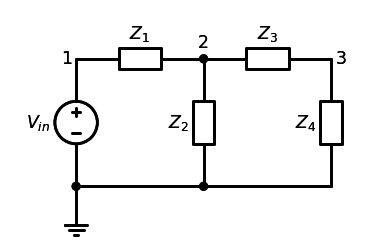

In [29]:
elm.style(elm.STYLE_IEC)
with schemdraw.Drawing(file='test.jpg') as d:
    R1 = d.add(elm.Resistor(lftlabel='1').right().label('$Z_1$'))
    C1 = d.add(elm.Resistor().down().label('$Z_2$'))     
    D1 = d.add(elm.Line().left())
    V1 = d.add(elm.SourceV().up().label('$V_{in}$'))
    L1=d.add(elm.LINE, d='down', xy=V1.start, l=d.unit/6)
    d.add(elm.GND)
    d.add(elm.DOT,xy=V1.start)
    R2 = d.add(elm.Resistor(xy=R1.end, rgtlabel='3').right().label('$Z_3$'))
    C2 = d.add(elm.Resistor().down().label('$Z_4$'))
    D2 = d.add(elm.Line(tox=C1.end).left())
    d.add(elm.DOT,xy=R2.start,label='2')
    d.add(elm.DOT,xy=C1.end)
    d.draw()

Assign Current directions.

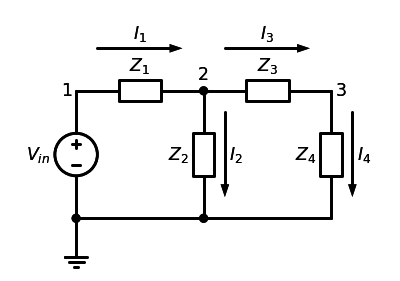

In [30]:
elm.style(elm.STYLE_IEC)
with schemdraw.Drawing(file='test.jpg') as d:
    R1 = d.add(elm.Resistor(lftlabel='1').right().label('$Z_1$'))
    d += elm.CurrentLabel(top=True, ofst=1).at(R1).label('$I_1$')
    C1 = d.add(elm.Resistor().down().label('$Z_2$'))     
    D1 = d.add(elm.Line().left())
    V1 = d.add(elm.SourceV().up().label('$V_{in}$'))
    L1=d.add(elm.LINE, d='down', xy=V1.start, l=d.unit/6)
    d.add(elm.GND)
    d.add(elm.DOT,xy=V1.start)
    R2 = d.add(elm.Resistor(xy=R1.end, rgtlabel='3').right().label('$Z_3$'))
    C2 = d.add(elm.Resistor().down().label('$Z_4$'))
    D2 = d.add(elm.Line(tox=C1.end).left())
    d.add(elm.DOT,xy=R2.start,label='2')
    d.add(elm.DOT,xy=C1.end)
    d += elm.CurrentLabel(top=False,reverse=True, ofst=.5).at(C1).label('$I_2$')
    d += elm.CurrentLabel(top=True, ofst=1).at(R2).label('$I_3$')
    d += elm.CurrentLabel(top=False, reverse=True,ofst=.5).at(C2).label('$I_4$')
    d.draw()

Import Sympy and set up symbol to solve for V2, V3.

Use Ohm's law to put the above equation to terms of voltages and impedances.
$$
\frac{V_1-V_2}{Z_1}=\frac{V_2}{Z_2}+\frac{V_2-V_3}{Z_3}
$$
and
$$
\frac{V_2-V_3}{Z_3}=\frac{V_3}{Z_4}
$$

Rearrange to get into matrix form:

 
$$
\frac{V_1}{Z_1}=V_2 \left(\frac{1}{Z_1}+\frac{1}{Z_2}+\frac{1}{Z_3}\right)+\frac{-V_3}{Z_3}
$$
and 
$$
0=\frac{-V_2}{Z_3}+\frac{V_3}{Z_4}
$$


In [31]:
from sympy import symbols
from sympy.matrices import Matrix
from sympy import *
import sympy as sym
Z1, Z2, Z3, Z4 = symbols("Z1, Z2, Z3, Z4")
I1, I2, I3, I4, V1, V2, V3,Vin= symbols("I1, I2, I3, I4, V1, V2, V3,Vin")

In [32]:
I1=(V1-V2)/Z1
I1

(V1 - V2)/Z1

In [33]:
I2=V2/Z2
I2

V2/Z2

In [34]:
I3=(V2-V3)/Z3
I3

(V2 - V3)/Z3

In [35]:
I4=V3/Z4
I4

V3/Z4

In [36]:
b0=(I1+I2+I3).expand().coeff(V1, 1)*Vin
b0

Vin/Z1

In [37]:
a11=(-I1+I2+I3).expand().coeff(V2, 1)
a11

1/Z3 + 1/Z2 + 1/Z1

In [38]:
a12=(-I1+I2+I3).expand().coeff(V3, 1)
a12

-1/Z3

In [39]:
b1=(I3+I4).expand().coeff(V1, 1)
b1

0

In [40]:
a21=(-I3+I4).expand().coeff(V2, 1)
a21

-1/Z3

In [41]:
a22=(-I3+I4).expand().coeff(V3, 1)
a22

1/Z4 + 1/Z3

In [42]:
A = Matrix([[a11,a12], [a21, a22]])
A

Matrix([
[1/Z3 + 1/Z2 + 1/Z1,       -1/Z3],
[             -1/Z3, 1/Z4 + 1/Z3]])

In [43]:
B = Matrix([b0,b1])
B

Matrix([
[Vin/Z1],
[     0]])

In [44]:
Sol=A.solve(B)
Sol

Matrix([
[(Vin*Z2*Z3 + Vin*Z2*Z4)/(Z1*Z2 + Z1*Z3 + Z1*Z4 + Z2*Z3 + Z2*Z4)],
[              Vin*Z2*Z4/(Z1*Z2 + Z1*Z3 + Z1*Z4 + Z2*Z3 + Z2*Z4)]])

In [45]:
R1, R2, C1, C2, = symbols("R1, R2, C1, C2 ",real=True, positive=True)
s= symbols("s")
Sol=Sol.subs(Z1,R1)
Sol=Sol.subs(Z2,1/s/C1)
Sol=Sol.subs(Z3,R2)
Sol=Sol.subs(Z4,1/s/C2)
Sol

Matrix([
[(R2*Vin/(C1*s) + Vin/(C1*C2*s**2))/(R1*R2 + R1/(C2*s) + R1/(C1*s) + R2/(C1*s) + 1/(C1*C2*s**2))],
[                  Vin/(C1*C2*s**2*(R1*R2 + R1/(C2*s) + R1/(C1*s) + R2/(C1*s) + 1/(C1*C2*s**2)))]])

In [46]:
H_LP=Sol[1].expand()/Vin
H_LP

1/(C1*C2*R1*R2*s**2 + C1*R1*s + C2*R1*s + C2*R2*s + 1)

In [47]:
num, de=fraction(H_LP)
de

C1*C2*R1*R2*s**2 + C1*R1*s + C2*R1*s + C2*R2*s + 1

Looking at the scale terms of the power of $$s^1$$ and $$s^0$$, we see R1, R2, C1, and C2 are in both scale factors, so we can not tune the damping ratio to any arbitrary value.  THe equations $$ \sqrt{b^2-4ac}$$ controls roots.
Make R2 a scaled version of R1. (R2=mR1), and C2 a scaled version of C1.

$$R_2=mR_2$$
$$C_2=C_1/m$$


$$
H(s)= \frac{a_2}{\left(s^2 + a_1 s+ a_2 \right)}
$$

$$ a_1=\frac{R_1C_1+R_1C_2+R_2C_2}{R_1R_2C_1C_2} $$

$$a_2=\frac{1}{R_1R_2C_1C_2} $$
The roots of the denominator (pole) determine the damping.
$$root_1,root_2=\frac{-a_1\pm\sqrt{a_1^2-4a_2}}{2}$$
For over damped we need two real roots or $$a_1^2>4a_2$$
For critically damped we need two repeated real roots. $$a_1^2=4a_2$$
For underdamped we need a pair of complex roots.. $$a_1^2<4a_2$$

This can be written in another  form:
$$H(s)=\frac{\omega_0^2}{s^2+2\zeta\omega_0s+\omega_0^2}$$
where $$\omega_0^2=a_2$$ and $$2\zeta\omega_0=a_1$$

In this form $$\zeta>1$$ means the system is overdamped, $$\zeta=1$$ the system is crtically damped and $$\zeta<1$$ the system is is underdamped.
In orer to tkae the inverse Lpalce transform and find the step function, you have to know the kind of poles you have or in short hand what the damping coeffcient $$\zeta$$ is.

This system can approach critcally damped, but never be underdamped.

$$ \left( \frac{R_1C_1+R_1C_2+R_2C_2}{R_1R_2C_1C_2}\right)^2<\frac{4}{R_1R_2C_1C_2}  $$

$$ \left( \frac{R_1C_1+R_1C_2+R_2C_2}{1}\right)^2<\frac{4R_1R_2C_1C_2}{1}  $$
There are four variables.  Simplify the analysis by stating m has to be a real, positve number.
$$R_2=Rm$$
$$C_2+C/m$$
$$R_1=R$$
$$C_1=C$$
$$ \left(RC+RC/m+RC \right)^2<4R^2C^2  $$
If we let m go to infinity then:
$$ \left(RC+RC \right)^2<4R^2C^2  $$ 

$$
4 R^2 C^2 < 4 R^2 C^2
$$ 
This is not true; they are equal when m approaches infinity. (In practice, m=2 is close enough, but m=10 seems to be used) in this case:
$$H(s)\approx\frac{1}{R^2C^2\left( s+\frac{1}{RC} \right)\left( s+ \frac{1}{RC} \right)}$$
If m=5
$$R_1=1k \Omega$$
$$R_2=5k \Omega$$
$$C_1=1 \mu F\Omega$$
$$C_2=200 n F\$$

The cut off frequency is
$$f_c=\frac{1}{2 \pi 1k 1 \mu}=159Hz$$

The problem with this circuit is that at the cut of frequency, there is a -6dB drop rather than a -3dB drop when you use a first-order filter.  We can have a second-order filter with a -3dB at the cut-off if we have complex poles. (Butterworth).  RLC can do this because a1 and a2 have an independent term, R a1=R/L or 1/RC, and a2=1\LC, but RLC circuits can have a minimum frequency they can operate at.

Use Ohm's law to put the aboce equaiton to terms of voltages and impedences
$$
\frac{V_1-V_2}{Z_1}=\frac{V_2-V_{out}}{Z_2}+\frac{V_2-V_3}{Z_3}
$$
and
$$
\frac{V_2-V_3}{Z_3}=\frac{V_3}{Z_4}
$$
Assume an Idela opanmps and $$V_{out}=V_3$$
Rearrange to get into MAtrix form:

 
$$
\frac{V_1}{Z_1}=V_2 \left(\frac{1}{Z_1}+\frac{1}{Z_2}+\frac{1}{Z_3}\right)-V_3\left(\frac{1}{Z_2}+\frac{1}{Z_3} \right)
$$
and 
$$
0=\frac{-V_2}{Z_3}+\frac{V_3}{Z_4}
$$

In [48]:
#We need numerical poles and zeros toplot Bode plot.
# Set R and C vlaues for plotting
m=1000
r1=1000.0
r2=r1*m
c1=1e-6
c2=c1/m
 
de=de.subs(R1,r1)
de=de.subs(C1,c1)
de=de.subs(R2,r2)
de=de.subs(C2,c2)

num=num.subs(R1,r1)
num=num.subs(C1,c1)
num=num.subs(R2,r2)
num=num.subs(C2,c2)

poles=roots(de,s)
zeros=roots(num,s)
de_o = degree(de)
num_o = degree(num) 
Gain=float(num.coeff(s,num_o)/de.coeff(s,de_o))
Gain

1000000.0

In [49]:
# Go though list of poles and zeros and make a list for the Bod plot function.
import numpy as np
plist=[]
for root, multiplicity in poles.items():
    plist.append(float(root))
plist=np.array(plist) 
nlist=[]
for root, multiplicity in zeros.items():
    nlist.append(float(root))
nlist=np.array(nlist) 

plist

array([-1032.1267292,  -968.8732708])

When m=1, R1=1kOhm, and C1=1uF p1=-2618.03398875, and p2=-381.96601125.

When m=2, R1=1kOhm, and C1=1uF p1=-2000, and p2=-500.

When m=5, R1=1kOhm, and C1=1uF p1=-1558.2575695, and p2= -641.7424305.

When m=10, R1=1kOhm, and C1=1uF p1=1370.15621187, and p2= -729.84378813.

When m=100, R1=1kOhm, and C1=1uF p1=1105.12492197, and p2= -904.8750780.3

When m=1000, R1=1kOhm, and C1=1uF p1=-1032.1267292, and p2= -968.8732708.

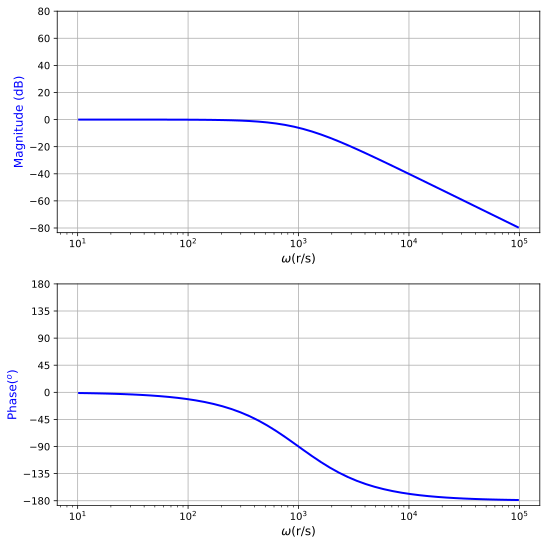

In [50]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
# N and D are a list of zeros and poles

N=nlist
D=plist
# autmoatically find the plotting range.
wo_min=(np.log10(abs(np.amin(D))))
wo_max=(np.log10(abs(np.amax(D))))
w=np.logspace(wo_min-2,wo_max+2,50)
#Create system that in zero, pole and gain format.
system = signal.lti(N, D,[Gain])
#Create Bode plot object
w, mag, phase = signal.bode(system,w)
#Create Bode Plot
axis_color = 'lightgoldenrodyellow'
 
fig, (ax, ax1) = plt.subplots(2,1,figsize=(8,8)) 
fig.subplots_adjust(left=0.25, bottom=0.25)
[line] = ax.semilogx(w,mag, linewidth=2, color='blue')

ax.set_xlabel('$\omega$(r/s)',fontsize=12)
ax.set_ylabel('Magnitude (dB)', color='b', fontsize=12) 
 
[line1] = ax1.semilogx(w,phase, linewidth=2, color='blue')
ax1.set_ylabel('Phase($^o$)', color='b', fontsize=12 ) 
ax1.set_xlabel('$\omega$(r/s)',fontsize=12)
ax1.yaxis.set_ticks(np.arange(-180,225, 45.0))
ax.yaxis.set_ticks(np.arange(-80,90, 20.0))
ax.grid()
ax1.grid()
plt.tight_layout(pad=2, w_pad=2, h_pad=1.0)
plt.show()

In [51]:
from sympy import *
t=symbols("t", real=True)
import sympy as sympy
de=de*Gain
num=num*Gain
G=1/s
H=num/de
F=G*H
# We have to turn the floats into rationals or the inverse laplace might not work.
for i in F.atoms(sympy.Float):
        r = sympy.Rational(i).limit_denominator(1000)
        F = F.subs(i, r)
z=inverse_laplace_transform(F,s,t).simplify()
z

-(sqrt(4001)*(-2001*exp(t*(2001 - sqrt(4001))/2) + sqrt(4001)*exp(t*(2001 - sqrt(4001))/2) + sqrt(4001)*exp(t*(sqrt(4001) + 2001)/2) + 2001*exp(t*(sqrt(4001) + 2001)/2)) - 8002*exp(2001*t))*exp(-2001*t)*Heaviside(t)/8002

f(t)=-(sqrt(4001)*(-2001*exp(t*(2001 - sqrt(4001))/2) + sqrt(4001)*exp(t*(2001 - sqrt(4001))/2) + sqrt(4001)*exp(t*(sqrt(4001) + 2001)/2) + 2001*exp(t*(sqrt(4001) + 2001)/2)) - 8002*exp(2001*t))*exp(-2001*t)*Heaviside(t)/8002


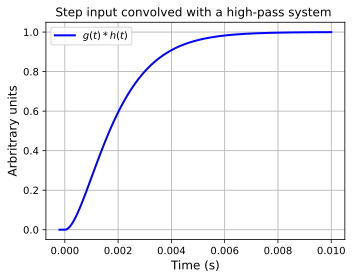

In [52]:
f=z
print('f(t)={}'.format(f)) 
N=1000
wo=np.sqrt(r1*r2*c1*c2)
t_start=-.2*wo
t_end=10*wo
time=np.linspace( t_start,t_end,N)
flam = lambdify(t, f, "numpy")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
legend='$g(t)*h(t) $'
[line] = ax.plot(time, flam(time), linewidth=2, color='blue',label=legend)
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
ax.legend()
ax.set_title('Step input convolved with a high-pass system ')
ax.grid()
plt.show() 

No matter how large we make m, the system only approaches a critically damped system.  Since critically damped low pass filters have two real, repeated poles, there will be 2, -3dB (-6dB) losses (attenuation) at omega0. This is due to the fact that R1, R2, C1, and C2 appear in the b^2 part and 4ac part of the quadratic equation and can not be independently set, like an RLC circuit.  To work at lower frequencies, Inudctors have to be physically large and so there is a need to be able to have an RC circuit that can be tuned to have complex poles.